In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1 K-Means Clustering

### Load Data

In [2]:
df = pd.read_csv('/Users/chenjiqing/Public/2022_Spring_term/QBS108 Applied ML/2022 file/Homework 2/tcga_pancancer/pancancer.csv')
df = df.drop('Unnamed: 0',axis=1)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-25.875320,56.783945,-58.522554,-23.657779,59.226184,32.978484,-55.835789,3.992981,-16.705564,-14.854115,-16.739289,-12.236637,0.631551,-0.895200,31.014503
1,-78.976524,-62.312761,33.852422,-2.165579,-5.288384,0.446068,24.361695,-44.745726,17.395310,-22.758601,13.726631,11.176496,-6.800069,9.362851,-7.950115
2,87.151357,-23.404469,-10.054268,63.831495,-8.287112,-42.402161,36.263516,-54.548902,33.558731,2.175367,-26.291564,-12.975848,24.410122,-28.263414,-17.609067
3,-43.224891,-24.016296,-4.744443,-66.180500,75.203354,-46.929467,37.587578,-20.590401,8.761443,-20.297368,4.353383,-2.354844,5.791677,1.503404,-1.664383
4,-63.589175,-66.331180,6.376695,25.804671,-35.920993,-20.097241,4.684812,-1.233395,-26.762385,18.346569,11.932363,0.081588,-3.752243,4.445100,-0.940169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,-77.968110,-64.215899,53.033778,16.772297,7.374632,51.174647,-22.336068,-17.173816,-16.990365,9.496480,19.249984,-17.164237,9.619327,-10.789798,8.587151
661,1.411024,33.721905,-97.514669,-35.977829,-32.405695,54.035778,27.624459,1.633711,-30.978002,-22.327608,15.138285,-20.205383,-6.395287,5.546136,2.314934
662,-69.761387,-80.963905,40.077150,7.640976,-18.890106,18.978991,-2.254887,-34.397698,2.597095,-6.976562,-11.659815,-6.662376,9.278010,-4.117283,-30.055490
663,-24.481133,61.988138,-65.444488,34.473801,-6.558216,54.685834,42.522086,0.694724,43.626111,22.321826,-20.691297,44.923379,-14.805007,-20.591455,-25.827407


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       665 non-null    float64
 1   1       665 non-null    float64
 2   2       665 non-null    float64
 3   3       665 non-null    float64
 4   4       665 non-null    float64
 5   5       665 non-null    float64
 6   6       665 non-null    float64
 7   7       665 non-null    float64
 8   8       665 non-null    float64
 9   9       665 non-null    float64
 10  10      665 non-null    float64
 11  11      665 non-null    float64
 12  12      665 non-null    float64
 13  13      665 non-null    float64
 14  14      665 non-null    float64
dtypes: float64(15)
memory usage: 78.1 KB


- No missing Values

In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,6.650000e+02,6.650000e+02,6.650000e+02,6.650000e+02,6.650000e+02,6.650000e+02,6.650000e+02,6.650000e+02,6.650000e+02,6.650000e+02,6.650000e+02,6.650000e+02,6.650000e+02,6.650000e+02,6.650000e+02
mean,5.128730e-16,2.564365e-16,6.838306e-16,-7.265700e-16,-8.547883e-17,-5.128730e-16,2.564365e-16,-1.709577e-16,2.136971e-16,2.564365e-16,8.547883e-16,-8.547883e-17,3.846547e-16,5.983518e-16,-4.060244e-16
std,8.126705e+01,6.536298e+01,5.221270e+01,3.631874e+01,3.486074e+01,3.342800e+01,2.608269e+01,2.340081e+01,2.243101e+01,1.965236e+01,1.914324e+01,1.779294e+01,1.708988e+01,1.677492e+01,1.627457e+01
min,-1.018639e+02,-9.465788e+01,-1.238769e+02,-1.209602e+02,-7.862494e+01,-9.644312e+01,-8.113492e+01,-7.474574e+01,-5.490130e+01,-5.870098e+01,-7.391167e+01,-5.091354e+01,-5.368153e+01,-4.472460e+01,-4.596087e+01
25%,-5.585776e+01,-5.007898e+01,-2.176080e+01,-2.296131e+01,-2.246344e+01,-2.361122e+01,-1.600493e+01,-1.637985e+01,-1.411962e+01,-1.336469e+01,-1.203067e+01,-1.022459e+01,-1.027628e+01,-1.135899e+01,-1.158139e+01
50%,-3.121861e+01,-1.626691e+01,9.400684e+00,-6.231582e+00,-3.753839e+00,1.149227e+00,-1.129484e+00,4.821054e-01,-6.971027e-01,-3.945739e-01,-1.057407e+00,-1.360354e-01,-1.799235e+00,2.717178e-01,-1.574868e+00
75%,1.828140e+00,3.597135e+01,3.356166e+01,1.716525e+01,1.390316e+01,2.234912e+01,1.621502e+01,1.574662e+01,1.330756e+01,1.237379e+01,1.109708e+01,8.011535e+00,8.542092e+00,1.116749e+01,1.029710e+01
max,1.799845e+02,1.977116e+02,1.300737e+02,1.657368e+02,1.253445e+02,9.710720e+01,1.063313e+02,8.092908e+01,9.623726e+01,8.809292e+01,8.502497e+01,5.819931e+01,8.065588e+01,5.273103e+01,7.654202e+01


## 1-1 a. Choose a suitable type of plot and visualize the first two features of the data.

In [5]:
# load module
import seaborn as sns

#### First feature

/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'First Feature')

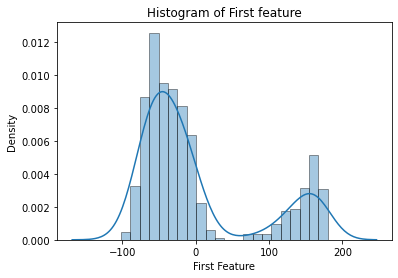

In [6]:
sns.distplot(df['0'], hist = True, hist_kws = {"edgecolor":"black"})
plt.title("Histogram of First feature")
plt.xlabel("First Feature")

#### Second feature

/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Second Feature')

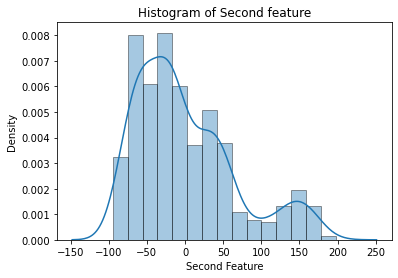

In [7]:
sns.distplot(df['1'], hist = True, hist_kws = {"edgecolor":"black"})
plt.title("Histogram of Second feature")
plt.xlabel("Second Feature")

## 1-1 b. From your plot, how many clusters, k, do you recognize in the dataset?

- According to Histogram plot, I think 2 clusters in the dataset.

## 1-2 a. Using the k-Means algorithm, implement a clustering model. Train the clustering model using all 15 features from the data.

In [8]:
from sklearn.cluster import KMeans

k_cluster = []
AICs = []
BICs = []
for k in range(2,6):
    kmeans = KMeans(n_clusters=k, random_state=3).fit(df)
    AIC = df.shape[0]*np.log(kmeans.inertia_/df.shape[0]) + 2*k
    BIC = df.shape[0]*np.log(kmeans.inertia_/df.shape[0]) + k*np.log(df.shape[0])
    k_cluster.append(k)
    AICs.append(AIC)
    BICs.append(BIC)

#### Plot AIC for each value of k.

Text(0, 0.5, 'AIC')

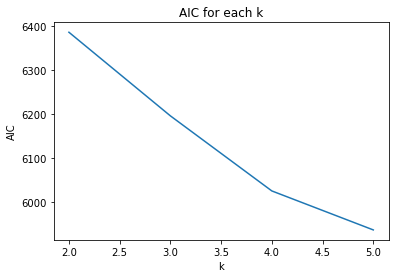

In [9]:
plt.plot(k_cluster, AICs)
plt.title("AIC for each k")
plt.xlabel("k")
plt.ylabel("AIC")

#### Plot BIC for each value of k.

Text(0, 0.5, 'BIC')

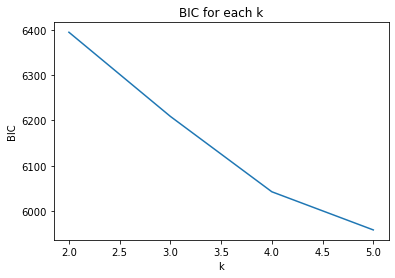

In [10]:
plt.plot(k_cluster, BICs)
plt.title("BIC for each k")
plt.xlabel("k")
plt.ylabel("BIC")

## 1-2 b. Which value of k is optimal?

- According to AIC and BIC plots, the optimal k is 5 (with lowest AIC and BIC values). The result doesn't meet my expectation in 1.1b

# 2 K-Nearest Neighbor Classification

### Load Data

#### Training Set

In [11]:
df_train = pd.read_csv('/Users/chenjiqing/Public/2022_Spring_term/QBS108 Applied ML/2022 file/Homework 2/wine/train.csv')
df_train = df_train.assign(good_quality = np.where(df_train['good_quality']==False,0,1)) # Convert target into 1, 0
df_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good_quality
0,7.6,0.420,0.08,2.70,0.084,15.0,48.0,0.99680,3.21,0.59,10.0,0
1,5.7,0.600,0.00,1.40,0.063,11.0,18.0,0.99191,3.45,0.56,12.2,1
2,7.5,0.610,0.26,1.90,0.073,24.0,88.0,0.99612,3.30,0.53,9.8,0
3,8.9,0.480,0.24,2.85,0.094,35.0,106.0,0.99820,3.10,0.53,9.2,0
4,7.0,0.620,0.18,1.50,0.062,7.0,50.0,0.99510,3.08,0.60,9.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1018,7.4,0.635,0.10,2.40,0.080,16.0,33.0,0.99736,3.58,0.69,10.8,1
1019,10.3,0.440,0.50,4.50,0.107,5.0,13.0,0.99800,3.28,0.83,11.5,0
1020,6.6,0.520,0.08,2.40,0.070,13.0,26.0,0.99358,3.40,0.72,12.5,1
1021,5.1,0.510,0.18,2.10,0.042,16.0,101.0,0.99240,3.46,0.87,12.9,1


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1023 non-null   float64
 1   volatile acidity      1023 non-null   float64
 2   citric acid           1023 non-null   float64
 3   residual sugar        1023 non-null   float64
 4   chlorides             1023 non-null   float64
 5   free sulfur dioxide   1023 non-null   float64
 6   total sulfur dioxide  1023 non-null   float64
 7   density               1023 non-null   float64
 8   pH                    1023 non-null   float64
 9   sulphates             1023 non-null   float64
 10  alcohol               1023 non-null   float64
 11  good_quality          1023 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 96.0 KB


- No missing values in each feature

#### Validation Set

In [13]:
df_val = pd.read_csv('/Users/chenjiqing/Public/2022_Spring_term/QBS108 Applied ML/2022 file/Homework 2/wine/val.csv')
df_val = df_val.assign(good_quality = np.where(df_val['good_quality']==False,0,1)) # Convert target into 1, 0
df_val

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good_quality
0,7.0,0.655,0.16,2.1,0.074,8.0,25.0,0.99606,3.37,0.55,9.7,0
1,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,0
2,5.2,0.480,0.04,1.6,0.054,19.0,106.0,0.99270,3.54,0.62,12.2,1
3,9.7,0.320,0.54,2.5,0.094,28.0,83.0,0.99840,3.28,0.82,9.6,0
4,8.1,0.870,0.00,2.2,0.084,10.0,31.0,0.99656,3.25,0.50,9.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
251,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,1
252,5.0,1.020,0.04,1.4,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,0
253,9.9,0.590,0.07,3.4,0.102,32.0,71.0,1.00015,3.31,0.71,9.8,0
254,9.1,0.500,0.30,1.9,0.065,8.0,17.0,0.99774,3.32,0.71,10.5,1


In [14]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         256 non-null    float64
 1   volatile acidity      256 non-null    float64
 2   citric acid           256 non-null    float64
 3   residual sugar        256 non-null    float64
 4   chlorides             256 non-null    float64
 5   free sulfur dioxide   256 non-null    float64
 6   total sulfur dioxide  256 non-null    float64
 7   density               256 non-null    float64
 8   pH                    256 non-null    float64
 9   sulphates             256 non-null    float64
 10  alcohol               256 non-null    float64
 11  good_quality          256 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 24.1 KB


- No missing values in each feature

#### Testing Set

In [15]:
df_test = pd.read_csv('/Users/chenjiqing/Public/2022_Spring_term/QBS108 Applied ML/2022 file/Homework 2/wine/test.csv')
df_test = df_test.assign(good_quality = np.where(df_test['good_quality']==False,0,1)) # Convert target into 1, 0
df_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good_quality
0,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,1
1,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,0
2,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,1
3,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,1
4,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
315,10.1,0.270,0.54,2.30,0.065,7.0,26.0,0.99531,3.17,0.53,12.5,1
316,6.9,0.390,0.24,2.10,0.102,4.0,7.0,0.99462,3.44,0.58,11.4,0
317,9.1,0.340,0.42,1.80,0.058,9.0,18.0,0.99392,3.18,0.55,11.4,0
318,9.1,0.765,0.04,1.60,0.078,4.0,14.0,0.99800,3.29,0.54,9.7,0


In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         320 non-null    float64
 1   volatile acidity      320 non-null    float64
 2   citric acid           320 non-null    float64
 3   residual sugar        320 non-null    float64
 4   chlorides             320 non-null    float64
 5   free sulfur dioxide   320 non-null    float64
 6   total sulfur dioxide  320 non-null    float64
 7   density               320 non-null    float64
 8   pH                    320 non-null    float64
 9   sulphates             320 non-null    float64
 10  alcohol               320 non-null    float64
 11  good_quality          320 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 30.1 KB


- No missing values in each feature

In [17]:
# Set Features and Target for each set.
df_train_y = df_train['good_quality'].copy()
df_val_y = df_val['good_quality'].copy()
df_test_y = df_test['good_quality'].copy()
df_train = df_train.drop(['good_quality'], axis=1).copy()
df_val = df_val.drop(['good_quality'], axis=1).copy()
df_test = df_test.drop(['good_quality'], axis=1).copy()

print(df_train.shape)
print(df_train_y.shape)
print(df_val.shape)
print(df_val_y.shape)
print(df_test.shape)
print(df_test_y.shape)

(1023, 11)
(1023,)
(256, 11)
(256,)
(320, 11)
(320,)


In [18]:
# Pre-processed data
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

df_train_SS = SS.fit_transform(df_train)
df_val_SS = SS.transform(df_val)
df_test_SS = SS.transform(df_test)

## 2-1. Train an k-Nearest Neighbors algorithm on the training dataset of your choice of k’s

In [19]:
from sklearn.neighbors import KNeighborsClassifier
k_cluster =[]
accuracy = []
for k in range(2,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(df_train_SS, df_train_y)
    print("k: ", k)
    print("Train Accuracy: ", knn.score(df_train_SS, df_train_y))
    print("Validation Accuracy: ", knn.score(df_val_SS, df_val_y))
    print('-'*20)
    k_cluster.append(k)
    accuracy.append(knn.score(df_val_SS, df_val_y))

k:  2
Train Accuracy:  0.8787878787878788
Validation Accuracy:  0.66796875
--------------------
k:  3
Train Accuracy:  0.8699902248289345
Validation Accuracy:  0.68359375
--------------------
k:  4
Train Accuracy:  0.8250244379276638
Validation Accuracy:  0.69140625
--------------------
k:  5
Train Accuracy:  0.820136852394917
Validation Accuracy:  0.71484375
--------------------
k:  6
Train Accuracy:  0.8005865102639296
Validation Accuracy:  0.703125
--------------------
k:  7
Train Accuracy:  0.7947214076246334
Validation Accuracy:  0.7265625
--------------------
k:  8
Train Accuracy:  0.7839687194525904
Validation Accuracy:  0.74609375
--------------------
k:  9
Train Accuracy:  0.7859237536656891
Validation Accuracy:  0.73828125
--------------------
k:  10
Train Accuracy:  0.7771260997067448
Validation Accuracy:  0.734375
--------------------


## 2-2. Report the classification accuracy of this model on the validation set for different values for k. Plot these accuracies against k and report the optimal value for k.

Text(0, 0.5, 'Validation Accuracy')

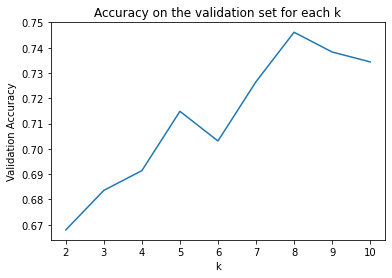

In [20]:
plt.plot(k_cluster, accuracy)
plt.title("Accuracy on the validation set for each k")
plt.xlabel("k")
plt.ylabel("Validation Accuracy")

- According to the plot, the optimal value for k is 8.

## 2-3. Report the classification accuracy of this model on the data in test.csv using the optimal value of k that you found in 2.2.

In [21]:
knn = KNeighborsClassifier(n_neighbors=8)
knn = knn.fit(df_train_SS, df_train_y)
print("k: ", 8)
print("Train Accuracy: ", knn.score(df_train_SS, df_train_y))
print("Testing Accuracy: ", knn.score(df_test_SS, df_test_y))

k:  8
Train Accuracy:  0.7839687194525904
Testing Accuracy:  0.71875


# 3 Decision Tree Classification

### Load Data

#### Training Set

In [22]:
df_train = pd.read_csv('/Users/chenjiqing/Public/2022_Spring_term/QBS108 Applied ML/2022 file/Homework 2/titanic/train.csv')
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,1,female,24,0,0,69.3000,B35,C,Mrs
1,0,3,female,3,3,1,21.0750,NaN,S,Miss
2,1,3,female,16,0,0,7.7333,NaN,Q,Miss
3,1,3,male,32,0,0,56.4958,NaN,S,Mr
4,0,3,male,22,0,0,7.1250,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...
493,0,2,male,52,0,0,13.5000,NaN,S,Mr
494,0,3,male,33,1,1,20.5250,NaN,S,Mr
495,1,2,male,38,0,0,13.0000,NaN,S,Mr
496,0,3,male,38,8,2,69.5500,NaN,S,Mr


In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  498 non-null    int64  
 1   Pclass    498 non-null    int64  
 2   Sex       498 non-null    object 
 3   Age       498 non-null    int64  
 4   SibSp     498 non-null    int64  
 5   Parch     498 non-null    int64  
 6   Fare      498 non-null    float64
 7   Cabin     113 non-null    object 
 8   Embarked  497 non-null    object 
 9   Title     498 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 39.0+ KB


- Cabin and Embarked contain missing values

In [24]:
print("Sex:")
print(df_train.Sex.value_counts(),"\n")
print("Cabin:")
print(df_train.Cabin.value_counts(),"\n")
print("Embarked:")
print(df_train.Embarked.value_counts(),"\n")
print("Title:")
print(df_train.Title.value_counts(),"\n")

Sex:
male      333
female    165
Name: Sex, dtype: int64 

Cabin:
C23 C25 C27    4
E101           3
G6             3
D35            2
C22 C26        2
              ..
B4             1
C78            1
D30            1
C87            1
B37            1
Name: Cabin, Length: 91, dtype: int64 

Embarked:
S    373
C     85
Q     39
Name: Embarked, dtype: int64 

Title:
Mr        295
Miss      102
Mrs        61
Master     27
Rare       13
Name: Title, dtype: int64 



#### Validation Set

In [25]:
df_val = pd.read_csv('/Users/chenjiqing/Public/2022_Spring_term/QBS108 Applied ML/2022 file/Homework 2/titanic/val.csv')
df_val

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,3,female,24,1,0,15.8500,NaN,S,Mrs
1,1,2,female,24,0,0,13.0000,F33,S,Miss
2,0,3,male,40,1,1,15.5000,NaN,Q,Mr
3,1,3,male,22,2,0,23.2500,NaN,Q,Mr
4,1,2,female,3,1,2,41.5792,NaN,C,Miss
...,...,...,...,...,...,...,...,...,...,...
120,1,2,female,31,1,1,26.2500,NaN,S,Mrs
121,1,3,male,19,0,0,7.7500,NaN,Q,Mr
122,1,1,female,43,0,1,211.3375,B3,S,Mrs
123,0,2,male,52,0,0,13.0000,NaN,S,Mr


In [26]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  125 non-null    int64  
 1   Pclass    125 non-null    int64  
 2   Sex       125 non-null    object 
 3   Age       125 non-null    int64  
 4   SibSp     125 non-null    int64  
 5   Parch     125 non-null    int64  
 6   Fare      125 non-null    float64
 7   Cabin     26 non-null     object 
 8   Embarked  125 non-null    object 
 9   Title     125 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 9.9+ KB


- Cabin contains missing values

In [27]:
print("Sex:")
print(df_val.Sex.value_counts(),"\n")
print("Cabin:")
print(df_val.Cabin.value_counts(),"\n")
print("Embarked:")
print(df_val.Embarked.value_counts(),"\n")
print("Title:")
print(df_val.Title.value_counts(),"\n")

Sex:
male      77
female    48
Name: Sex, dtype: int64 

Cabin:
C65            2
C83            2
D46            1
D37            1
B101           1
B71            1
B51 B53 B55    1
E121           1
F33            1
C2             1
F38            1
E33            1
B3             1
B18            1
C124           1
D9             1
D26            1
C125           1
C123           1
C68            1
A19            1
E58            1
D49            1
A24            1
Name: Cabin, dtype: int64 

Embarked:
S    84
C    25
Q    16
Name: Embarked, dtype: int64 

Title:
Mr        73
Miss      26
Mrs       22
Master     4
Name: Title, dtype: int64 



#### Testing Set

In [28]:
df_test = pd.read_csv('/Users/chenjiqing/Public/2022_Spring_term/QBS108 Applied ML/2022 file/Homework 2/titanic/test.csv')
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,male,22,1,1,15.2458,NaN,C,Master
1,2,male,31,0,0,10.5000,NaN,S,Mr
2,3,male,20,0,0,7.9250,NaN,S,Mr
3,2,female,6,0,1,33.0000,NaN,S,Miss
4,3,female,14,1,0,11.2417,NaN,C,Miss
...,...,...,...,...,...,...,...,...,...
263,3,male,27,0,0,8.6625,NaN,S,Mr
264,1,male,27,0,0,0.0000,NaN,S,Mr
265,1,male,65,0,0,26.5500,E38,S,Mr
266,3,male,17,0,0,8.6625,NaN,S,Mr


In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    268 non-null    int64  
 1   Sex       268 non-null    object 
 2   Age       268 non-null    int64  
 3   SibSp     268 non-null    int64  
 4   Parch     268 non-null    int64  
 5   Fare      268 non-null    float64
 6   Cabin     65 non-null     object 
 7   Embarked  267 non-null    object 
 8   Title     268 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 19.0+ KB


- Cabin and Embarked contain missing values

In [30]:
print("Sex:")
print(df_test.Sex.value_counts(),"\n")
print("Cabin:")
print(df_test.Cabin.value_counts(),"\n")
print("Embarked:")
print(df_test.Embarked.value_counts(),"\n")
print("Title:")
print(df_test.Title.value_counts(),"\n")

Sex:
male      167
female    101
Name: Sex, dtype: int64 

Cabin:
E25                2
B58 B60            2
D                  2
B57 B59 B63 B66    2
C126               2
B96 B98            2
C52                2
C92                1
B49                1
E34                1
C82                1
C148               1
C110               1
D17                1
C104               1
C123               1
D11                1
C86                1
A31                1
A7                 1
E68                1
B69                1
D21                1
D19                1
D10 D12            1
B28                1
E77                1
A6                 1
E49                1
E36                1
D20                1
B39                1
C78                1
C45                1
B30                1
F33                1
E63                1
G6                 1
B86                1
C22 C26            1
F2                 1
E38                1
A20                1
B38                1
D7        

## 3-1. Preprocess the data

- Set Features and Target for training and validation set. 

In [31]:
df_train_y = df_train['Survived'].copy()
df_val_y = df_val['Survived'].copy()
df_train = df_train.drop(['Survived'], axis=1).copy()
df_val = df_val.drop(['Survived'], axis=1).copy()

print(df_train.shape)
print(df_train_y.shape)
print(df_val.shape)
print(df_val_y.shape)

(498, 9)
(498,)
(125, 9)
(125,)


- For each set, more than 75% values in Cabin are missing values so I will remove this feature for the following analysis.

In [32]:
df_train2 = df_train.drop('Cabin',axis=1).copy()
df_val2 = df_val.drop('Cabin',axis=1).copy()
df_test2 = df_test.drop('Cabin',axis=1).copy()

- Because Decision Tree only can handle numbers so I need to convert the strings to numeric. However, in vlidation set, the 'Title' feature doesn't have 'Rare' label. As a result, I need to combine training, testing, and validation set together first, then, convert the strings to numeric.

In [33]:
# Combine 3 dataset
df_train2['set'] = "Train"
df_val2['set'] = "Val"
df_test2['set'] = "Test"

df = pd.concat([df_train2,df_val2,df_test2])
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,set
0,1,female,24,0,0,69.3000,C,Mrs,Train
1,3,female,3,3,1,21.0750,S,Miss,Train
2,3,female,16,0,0,7.7333,Q,Miss,Train
3,3,male,32,0,0,56.4958,S,Mr,Train
4,3,male,22,0,0,7.1250,S,Mr,Train
...,...,...,...,...,...,...,...,...,...
263,3,male,27,0,0,8.6625,S,Mr,Test
264,1,male,27,0,0,0.0000,S,Mr,Test
265,1,male,65,0,0,26.5500,S,Mr,Test
266,3,male,17,0,0,8.6625,S,Mr,Test


In [34]:
print("Sex:")
print(df.Sex.value_counts(),"\n")
print("Embarked:")
print(df.Embarked.value_counts(),"\n")
print("Title:")
print(df.Title.value_counts(),"\n")

Sex:
male      577
female    314
Name: Sex, dtype: int64 

Embarked:
S    644
C    168
Q     77
Name: Embarked, dtype: int64 

Title:
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64 



In [35]:
# convert the strings to numeric
# Since Embarked has missing values, I will turn missing into new category.
df = df.assign(Sex = np.where(df['Sex']=='male',0,1),
               Embarked = np.where(df['Embarked']=='C',0,np.where(df['Embarked']=='S',1,
                                                                 np.where(df['Embarked']=='Q',2,3))),
               Title = np.where(df['Title']=='Mr',0,np.where(df['Title']=='Miss',1,
                                                            np.where(df['Title']=='Mrs',2,
                                                                    np.where(df['Title']=='Master',3,4))))).copy()

df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,set
0,1,1,24,0,0,69.3000,0,2,Train
1,3,1,3,3,1,21.0750,1,1,Train
2,3,1,16,0,0,7.7333,2,1,Train
3,3,0,32,0,0,56.4958,1,0,Train
4,3,0,22,0,0,7.1250,1,0,Train
...,...,...,...,...,...,...,...,...,...
263,3,0,27,0,0,8.6625,1,0,Test
264,1,0,27,0,0,0.0000,1,0,Test
265,1,0,65,0,0,26.5500,1,0,Test
266,3,0,17,0,0,8.6625,1,0,Test


In [36]:
# Check
print("Sex:")
print(df.Sex.value_counts(),"\n")
print("Embarked:")
print(df.Embarked.value_counts(),"\n")
print("Title:")
print(df.Title.value_counts(),"\n")

Sex:
0    577
1    314
Name: Sex, dtype: int64 

Embarked:
1    644
0    168
2     77
3      2
Name: Embarked, dtype: int64 

Title:
0    517
1    185
2    126
3     40
4     23
Name: Title, dtype: int64 



In [37]:
# Split it back to 3 dataset
df_train3 = df[df['set'] =='Train'].copy()
df_train3 = df_train3.drop('set',axis=1)
print(df_train3)

df_val3 = df[df['set'] =='Val'].copy()
df_val3 = df_val3.drop('set',axis=1)
print(df_val3)

df_test3 = df[df['set'] =='Test'].copy()
df_test3 = df_test3.drop('set',axis=1)
print(df_test3)

     Pclass  Sex  Age  SibSp  Parch     Fare  Embarked  Title
0         1    1   24      0      0  69.3000         0      2
1         3    1    3      3      1  21.0750         1      1
2         3    1   16      0      0   7.7333         2      1
3         3    0   32      0      0  56.4958         1      0
4         3    0   22      0      0   7.1250         1      0
..      ...  ...  ...    ...    ...      ...       ...    ...
493       2    0   52      0      0  13.5000         1      0
494       3    0   33      1      1  20.5250         1      0
495       2    0   38      0      0  13.0000         1      0
496       3    0   38      8      2  69.5500         1      0
497       1    1   56      0      1  83.1583         0      2

[498 rows x 8 columns]
     Pclass  Sex  Age  SibSp  Parch      Fare  Embarked  Title
0         3    1   24      1      0   15.8500         1      2
1         2    1   24      0      0   13.0000         1      1
2         3    0   40      1      1   15.50

## 3-2. Decision Trees Classification

### 3-2-a. Initialize a binary decision tree model for the training data.

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier(random_state=0)

[Text(173.75830792682927, 211.04470588235293, 'X[7] <= 0.5\ngini = 0.471\nsamples = 498\nvalue = [309, 189]'),
 Text(83.94100609756097, 198.25411764705882, 'X[0] <= 1.5\ngini = 0.277\nsamples = 295\nvalue = [246, 49]'),
 Text(19.053658536585367, 185.4635294117647, 'X[5] <= 15.644\ngini = 0.46\nsamples = 53\nvalue = [34, 19]'),
 Text(15.42439024390244, 172.6729411764706, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(22.682926829268293, 172.6729411764706, 'X[5] <= 27.135\ngini = 0.475\nsamples = 49\nvalue = [30, 19]'),
 Text(10.887804878048781, 159.88235294117646, 'X[2] <= 53.5\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(7.258536585365854, 147.09176470588235, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(14.517073170731708, 147.09176470588235, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(34.4780487804878, 159.88235294117646, 'X[3] <= 0.5\ngini = 0.444\nsamples = 42\nvalue = [28, 14]'),
 Text(21.775609756097563, 147.09176470588235, 'X[4] <= 1.5\ngini = 0.34\nsamples =

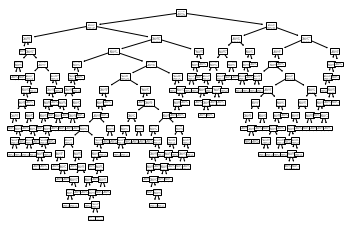

In [39]:
dt2 = dt.fit(df_train3, df_train_y)
tree.plot_tree(dt2)

In [40]:
dt2.score(df_train3, df_train_y)

0.9919678714859438

In [41]:
dt2.score(df_val3, df_val_y)

0.768

- The model is overfiting for default setting.

### 3-2-b. Improve a decision tree model by tuning some hyperparam- eters for terminating the splitting process. Tune the maximum depth of the tree

Max Depth:  1
Train Accuracy:  0.7751004016064257
Validation Accuracy:  0.792
--------------------
Max Depth:  2
Train Accuracy:  0.7811244979919679
Validation Accuracy:  0.856
--------------------
Max Depth:  3
Train Accuracy:  0.8273092369477911
Validation Accuracy:  0.848
--------------------
Max Depth:  4
Train Accuracy:  0.8413654618473896
Validation Accuracy:  0.816
--------------------
Max Depth:  5
Train Accuracy:  0.8534136546184738
Validation Accuracy:  0.824
--------------------
Max Depth:  6
Train Accuracy:  0.8815261044176707
Validation Accuracy:  0.784
--------------------
Max Depth:  7
Train Accuracy:  0.8975903614457831
Validation Accuracy:  0.816
--------------------
Max Depth:  8
Train Accuracy:  0.9156626506024096
Validation Accuracy:  0.816
--------------------
Max Depth:  9
Train Accuracy:  0.9397590361445783
Validation Accuracy:  0.808
--------------------
Max Depth:  10
Train Accuracy:  0.9558232931726908
Validation Accuracy:  0.776
--------------------


Text(0, 0.5, 'Validation Accuracy')

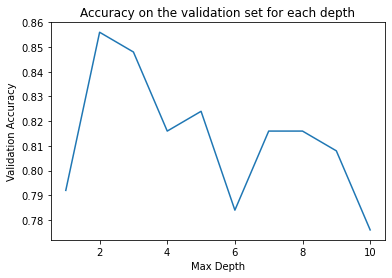

In [42]:
depth =[]
accuracy = []
for max_depth in range(1,11):
    dt = DecisionTreeClassifier(random_state=0, max_depth=max_depth)
    dt = dt.fit(df_train3, df_train_y)
    print("Max Depth: ", max_depth)
    print("Train Accuracy: ", dt.score(df_train3, df_train_y))
    print("Validation Accuracy: ", dt.score(df_val3, df_val_y))
    print('-'*20)
    depth.append(max_depth)
    accuracy.append(dt.score(df_val3, df_val_y))

plt.plot(depth, accuracy)
plt.title("Accuracy on the validation set for each depth")
plt.xlabel("Max Depth")
plt.ylabel("Validation Accuracy")

- According to the plot, the optimum maximum depth is 2.

### 3-2-C. Train a decision tree classifier using the optimum setting of max- imum depth found in 3.2b on all data from the training and validation set.

In [43]:
# Combine training and validation set
df_train_val = pd.concat([df_train3, df_val3])
df_train_val_y = pd.concat([df_train_y, df_val_y])

# Set Decision tree classifier
dt = DecisionTreeClassifier(random_state=1, max_depth = 2)

# Train model
dt.fit(df_train_val, df_train_val_y)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [44]:
# Predict
y_pred = dt.predict(df_test3)
y_pred

# Create data frame for Prediction
df_pred = pd.DataFrame(y_pred)
df_pred

# save the predictions
df_pred.to_csv('F0034WQ_dt_prediction.csv', index=False, header = False)

# 4 Random Forest Classification

### 4-1. Initialize a random forest classifier.

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(df_train3, df_train_y)

# Accuracy on Validation set in default set
print("Validation Accuracy: ", rf.score(df_val3, df_val_y))

Validation Accuracy:  0.816


### 4-2. Optimize your classifier by tuning two hyperparameters to maximize the accuracy of your model:

In [46]:
from sklearn.model_selection import GridSearchCV

# Create the grid search hyperparameter
grid_hyper =  {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
               'n_estimators': [50,100,150,200,250]}

# classifier
rf = RandomForestClassifier(random_state = 2)

# search different combinations.
rf_GRCV = GridSearchCV(estimator = rf, param_grid = grid_hyper, cv = 10)

# Fit the model
rf_GRCV.fit(df_train_val, df_train_val_y)

# best hyperparameters
print("Optimum parameters: ", rf_GRCV.best_params_)

Optimum parameters:  {'max_depth': 7, 'n_estimators': 150}


### 4-3. Report and interpret the feature importance of each feature by your random forest model.

In [47]:
# classifier with best hyperparameters
rf = RandomForestClassifier(random_state = 2, max_depth = 7, n_estimators = 150)
rf.fit(df_train_val, df_train_val_y)

RandomForestClassifier(max_depth=7, n_estimators=150, random_state=2)

Text(0, 0.5, 'Feature Names')

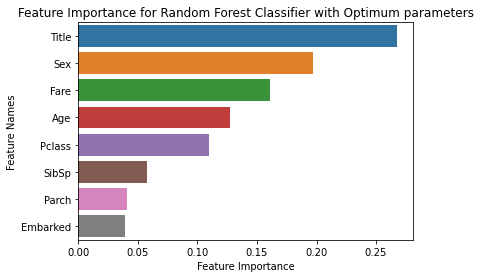

In [48]:
# Generate feature importance and feature names
feature_importance = np.array(rf.feature_importances_)
feature_names = np.array(df_train_val.columns)

# Generate a DataFrame for feature importance
data={'feature_names':feature_names,'feature_importance':feature_importance}
feature_importance_df = pd.DataFrame(data)

# Sort the DataFrame according to feature importance
feature_importance_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

# Plot
import seaborn as sns
sns.barplot(x = feature_importance_df['feature_importance'], y = feature_importance_df['feature_names'])
plt.title('Feature Importance for Random Forest Classifier with Optimum parameters')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')

- According to the above plot, we can see the most important feature in my model is "Title".

### 4-4. Predict the survivals on testing data using the classifier with the opti- mum parameters from 4.2.

In [49]:
# Predict
y_pred = rf.predict(df_test3)
y_pred

# Create data frame for Prediction
df_pred = pd.DataFrame(y_pred)
df_pred

# save the predictions
df_pred.to_csv('F0034WQ_rf_prediction.csv', index=False, header = False)

# 5. SVM classification

In [50]:
# Pre-processed data
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

df_train3_SS = SS.fit_transform(df_train3)
df_val3_SS = SS.transform(df_val3)
df_test3_SS = SS.transform(df_test3)

### 5-1. Build SVM classifiers with the following three kernels: linear, polynomial with degree = 2, and radial basis function kernel. Train the classifiers and calculate the performance of each classifier on the validation set.

In [51]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC

svm_linear = SVC(kernel = 'linear')
svm_poly = SVC(kernel = 'poly', degree = 2, probability = True)
svm_rbf = SVC(kernel = 'rbf', probability = True)

# kernels: linear
svm_linear.fit(df_train3_SS, df_train_y)
print("kernels: linear")
print("Validation Accuracy: ", svm_linear.score(df_val3_SS, df_val_y))
print('-'*20)

# kernels: polynomial with degree = 2
svm_poly.fit(df_train3_SS, df_train_y)
print("kernels: polynomial with degree = 2")
print("Validation Accuracy: ", svm_poly.score(df_val3_SS, df_val_y))
print('Loss of Validation Set:', log_loss(df_val_y, svm_poly.predict_proba(df_val3_SS)) )
print('-'*20)

# kernels: radial basis function
svm_rbf.fit(df_train3_SS, df_train_y)
print("kernels: radial basis function")
print("Validation Accuracy: ", svm_rbf.score(df_val3_SS, df_val_y))
print('Loss of Validation Set:', log_loss(df_val_y, svm_rbf.predict_proba(df_val3_SS)) )
print('-'*20)

kernels: linear
Validation Accuracy:  0.84
--------------------
kernels: polynomial with degree = 2
Validation Accuracy:  0.856
Loss of Validation Set: 0.4049651318151844
--------------------
kernels: radial basis function
Validation Accuracy:  0.856
Loss of Validation Set: 0.3780804868895341
--------------------


### 5-2. Which kernel gives the best result? Use your classifier with the this kernel to predict the survival outcomes in the testing set.

- Although classifier with kernel = polynomial and classifier with kernel = radial basis function return same accuracy, classifier with kernel = radial basis function returns smaller Loss. As a result, classifier with kernel = radial basis function gives the best result.

In [52]:
# Predict
y_pred = svm_rbf.predict(df_test3_SS)
y_pred

# Create data frame for Prediction
df_pred = pd.DataFrame(y_pred)
df_pred

# save the predictions
df_pred.to_csv('F0034WQ_svm_prediction.csv', index=False, header = False)